###Task 1: Data Understanding and Visualization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


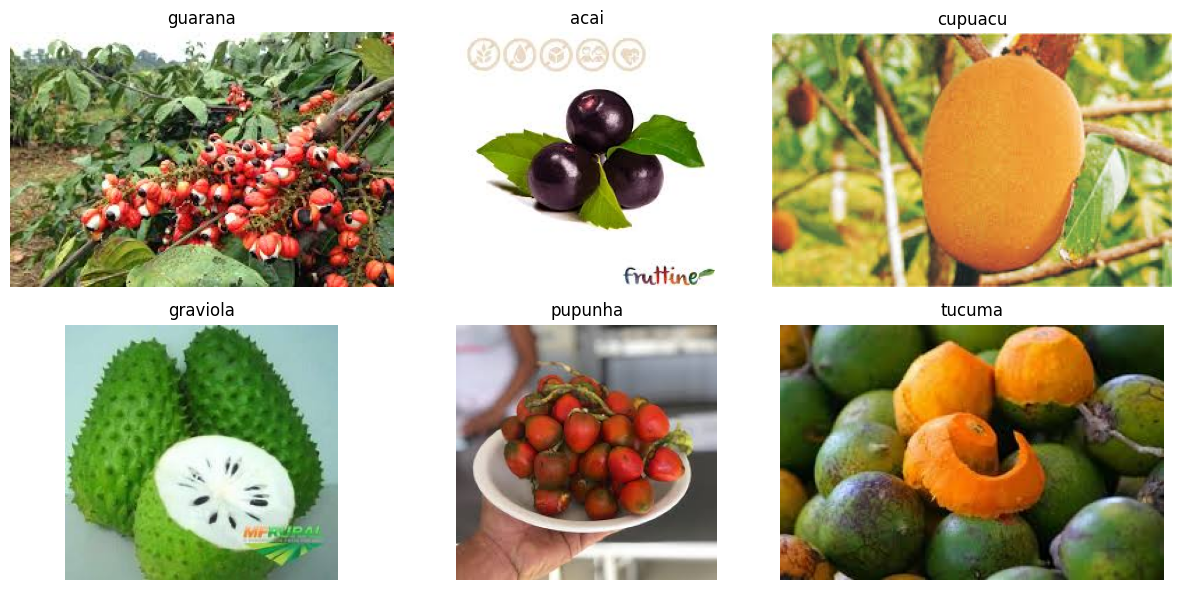

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the train dataset
train_dir = "/content/drive/MyDrive/AI_worksheet-05/FruitinAmazon/FruitinAmazon/train"

# Get the list of class directions
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Get the list of class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Select one random image from each class
selected_images = []
labels = []

for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    images = [img for img in os.listdir(class_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
    if images:
        selected_image = random.choice(images)
        selected_images.append(os.path.join(class_path, selected_image))
        labels.append(class_dir)

# Display images in a grid with two rows
num_images = len(selected_images)
cols = num_images // 2 + num_images % 2  # Ensure we have two rows
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

# Flatten axes for easy iteration if necessary
axes = axes.flatten()

for i, img_path in enumerate(selected_images):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(labels[i])
    axes[i].axis('off')

# Hide any extra subplot spaces if class count is odd
for i in range(len(selected_images), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


###Task 2: Loading and Preprocessing Image Data in keras

In [13]:
import tensorflow as tf

# Define the dataset
train_dir = "/content/drive/MyDrive/AI_worksheet-05/FruitinAmazon/FruitinAmazon/train"

# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0,1]

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",  # Use folder names as labels
    label_mode="int",  # Encode labels as integers
    image_size=(img_height, img_width),
    interpolation="nearest",
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset="training",
    seed=123  # Ensures the same split each time
)

# Apply normalization to training dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=(img_height, img_width),
    interpolation="nearest",
    batch_size=batch_size,
    shuffle=False,  # No need to shuffle validation data
    validation_split=validation_split,
    subset="validation",
    seed=123
)

# Apply normalization to validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Display dataset structure
print(f"Training dataset: {train_ds}")
print(f"Validation dataset: {val_ds}")


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Training dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


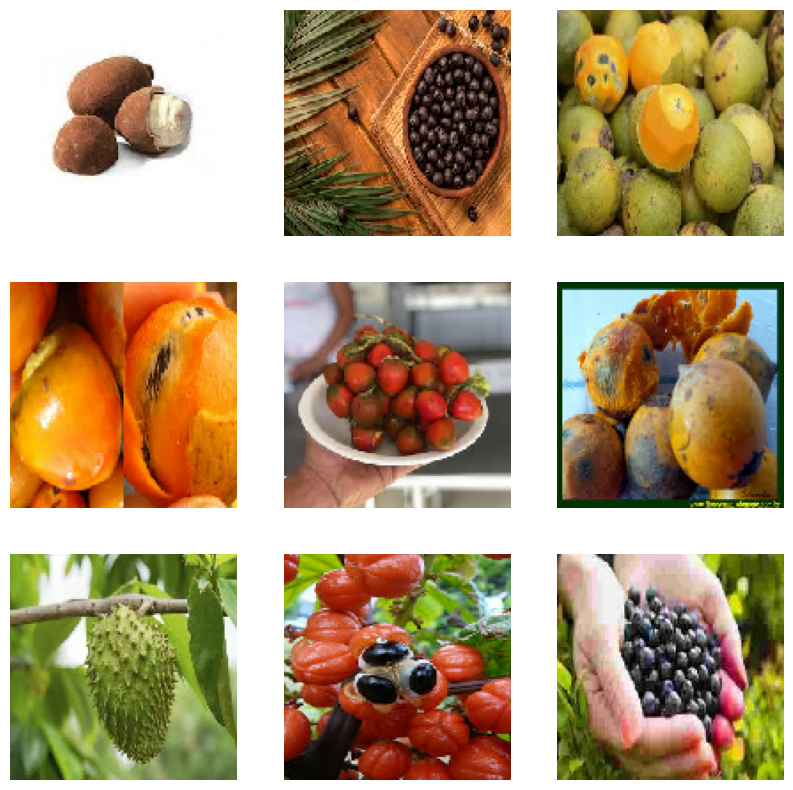

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from train_ds
image_batch, label_batch = next(iter(train_ds))

# Plot some images
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)  # Indented properly
    plt.imshow(image_batch[i].numpy())  # Convert tensor to numpy
    plt.axis("off")  # Hide axis

plt.show()  # Show the images


###Task 3 - Implement a CNN

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_cnn(input_shape, num_classes):
  model = models.Sequential()

  # Convolutional Layer 1
  model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=input_shape))
  # Pooling Layer 1
  model.add(layers.MaxPooling2D((2, 2), strides=2))

  # Convolutional Layer 2
  model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
  # Pooling Layer 2
  model.add(layers.MaxPooling2D((2, 2), strides=2))

  # Flatten Layer
  model.add(layers.Flatten())

  # Fully Connected Layers
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))

  # Output Layer
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model


# Change input_shape to match the image size used in the dataset
input_shape = (128, 128, 3)
num_classes = 10
model = build_cnn(input_shape, num_classes)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

###Task 4: Compile the Model

In [19]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Step 1: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




###Task 4: Train the Model

In [20]:
# Define callbacks
checkpoint_callback = ModelCheckpoint(
    'best_model.h5',           # Save model as 'best_model.h5' when improved
    monitor='val_loss',        # Monitor validation loss
    save_best_only=True,       # Save the best model (the one with lowest validation loss)
    verbose=1,                 # Show output when saving
    mode='min'                 # Minimize the validation loss
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',        # Monitor validation loss for early stopping
    patience=10,               # Stop training if no improvement for 10 epochs
    restore_best_weights=True, # Restore the weights of the best model
    verbose=1                  # Show output when stopping
)

# Step 2: Train the Model
history = model.fit(
    train_ds,                  # Training dataset
    epochs=250,                # Number of epochs
    batch_size=16,             # Batch size
    validation_data=val_ds,    # Validation dataset
    callbacks=[checkpoint_callback, early_stopping_callback],  # Callbacks
    verbose=1                  # Show progress during training
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0394 - loss: 2.4519
Epoch 1: val_loss improved from inf to 1.68397, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.0434 - loss: 2.4648 - val_accuracy: 0.0000e+00 - val_loss: 1.6840
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.3056 - loss: 2.0240
Epoch 2: val_loss did not improve from 1.68397
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 552ms/step - accuracy: 0.3021 - loss: 2.0100 - val_accuracy: 0.5000 - val_loss: 1.8383
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.5174 - loss: 1.7222
Epoch 3: val_loss did not improve from 1.68397
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - accuracy: 0.5026 - loss: 1.7263 - val_accuracy: 0.4444 - val_loss: 1.8295
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.5903 - loss: 1.4425
Epoch 4: val_loss improved from 1.68397 to 0.79152, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 590ms/step - accuracy: 0.5885 - loss: 1.4370 - val_accuracy: 0.7778 - val_loss: 0.7915
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.5191 - loss: 1.1725
Epoch 5: val_loss did not improve from 0.79152
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 616ms/step - accuracy: 0.5247 - loss: 1.1670 - val_accuracy: 0.5556 - val_loss: 1.4025
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.6400 - loss: 0.9410
Epoch 6: val_loss did not improve from 0.79152
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 851ms/step - accuracy: 0.6398 - loss: 0.9476 - val_accuracy: 0.6667 - val_loss: 0.9391
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.7749 - loss: 0.7648
Epoch 7: val_loss improved from 0.79152 to 0.64501, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 498ms/step - accuracy: 0.7756 - loss: 0.7694 - val_accuracy: 0.7222 - val_loss: 0.6450
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9010 - loss: 0.4981
Epoch 8: val_loss did not improve from 0.64501
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 457ms/step - accuracy: 0.8945 - loss: 0.5097 - val_accuracy: 0.7222 - val_loss: 0.9028
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9091 - loss: 0.4300
Epoch 9: val_loss improved from 0.64501 to 0.54947, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 521ms/step - accuracy: 0.9145 - loss: 0.4260 - val_accuracy: 0.8333 - val_loss: 0.5495
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9253 - loss: 0.3326
Epoch 10: val_loss did not improve from 0.54947
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step - accuracy: 0.9232 - loss: 0.3339 - val_accuracy: 0.7778 - val_loss: 0.7364
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9294 - loss: 0.2147
Epoch 11: val_loss did not improve from 0.54947
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 529ms/step - accuracy: 0.9332 - loss: 0.2113 - val_accuracy: 0.8333 - val_loss: 0.5748
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9502 - loss: 0.2225
Epoch 12: val_loss improved from 0.54947 to 0.51691, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 831ms/step - accuracy: 0.9488 - loss: 0.2261 - val_accuracy: 0.8333 - val_loss: 0.5169
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.9757 - loss: 0.1283
Epoch 13: val_loss did not improve from 0.51691
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 642ms/step - accuracy: 0.9714 - loss: 0.1328 - val_accuracy: 0.7778 - val_loss: 0.7152
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 1.0000 - loss: 0.0817
Epoch 14: val_loss did not improve from 0.51691
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 491ms/step - accuracy: 1.0000 - loss: 0.0823 - val_accuracy: 0.7222 - val_loss: 0.8219
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.9398 - loss: 0.2218
Epoch 15: val_loss improved from 0.51691 to 0.20791, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 505ms/step - accuracy: 0.9410 - loss: 0.2149 - val_accuracy: 0.9444 - val_loss: 0.2079
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 1.0000 - loss: 0.0588
Epoch 16: val_loss did not improve from 0.20791
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 529ms/step - accuracy: 1.0000 - loss: 0.0600 - val_accuracy: 0.8889 - val_loss: 0.3459
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.9797 - loss: 0.0751
Epoch 17: val_loss did not improve from 0.20791
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step - accuracy: 0.9813 - loss: 0.0745 - val_accuracy: 0.8333 - val_loss: 0.5147
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 1.0000 - loss: 0.0249
Epoch 18: val_loss did not improve from 0.20791
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 789ms/step - accuracy: 1.0000 - loss: 0.0258 - val_accuracy: 0.8333 - val_loss: 0.6845
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 1.0000 - loss: 0.0296
Epoch 19: val_loss did not improve from 0.20791
3/3 

###Task 5: Evaluate the Model

In [21]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.9444 - loss: 0.2079
Validation Loss: 0.20790667831897736
Validation Accuracy: 0.9444444179534912


###Task 6: Save the Model

In [22]:
# Save the trained model to an .h5 file
model.save('/content/best_model.h5')
print("Model saved to /content/best_model.h5 ")

Model saved to /content/best_model.h5 


###Task 6: Load the Model

In [23]:
# Load the saved model
loaded_model = tf.keras.models.load_model('/content/best_model.h5')
print("Model loaded successfully")

# Re-evaluate the model on the validation/test set
test_loss, test_accuracy = loaded_model.evaluate(val_ds)
print(f"Re-evaluated Test Loss: {test_loss}")
print(f"Re-evaluated Test Accuracy: {test_accuracy}")


Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.9444 - loss: 0.2079
Re-evaluated Test Loss: 0.20790667831897736
Re-evaluated Test Accuracy: 0.9444444179534912


###Task 7: Predictions and Classification Report

In [25]:
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report

# Check the class distribution in the validation dataset
y_true = np.concatenate([y for x, y in val_ds], axis=0)
print(Counter(y_true))  # This will print the number of samples per class

# Get predictions on the validation dataset
y_pred = model.predict(val_ds)
y_pred_labels = np.argmax(y_pred, axis=-1)

# Generate the Classification Report with zero_division to handle ill-defined metrics
report = classification_report(y_true, y_pred_labels, zero_division=0)
print(report)


Counter({np.int32(5): 15, np.int32(4): 3})
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         3
           5       1.00      0.93      0.97        15

    accuracy                           0.94        18
   macro avg       0.67      0.64      0.66        18
weighted avg       1.00      0.94      0.97        18

